In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from utils.matrix_builder import create_expanded_feature_matrix, create_feature_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load Database
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

def regression_training_fe(df, sliding_window, lag_price_window, DEBUG):
    """
    Train a regression model using a sliding window approach.
    
    Parameters:
    - df: DataFrame containing the dataset with features and target variable.
    - sliding_window: Number of rows to use for training in each sliding window.
    - lag_price_window: Number of previous days to use as features.
    
    Returns:
    - prediction_df: DataFrame containing predictions and actual values.
    """
    if DEBUG:
        print("Debug mode is ON. Detailed output will be printed.")

    # Validate input parameters
    if sliding_window <= lag_price_window:
        raise ValueError("Sliding window must be greater than to the price feature window.")

    training_sliding_window = sliding_window + 1  # +1 to include the next row as the test set

    # Calculate number of sliding window models to train in the dataset
    num_sliding_windows = len(df) - training_sliding_window
    if DEBUG:
        # Training for sliding windows and price feature window
        print(f"Training sliding window size: {training_sliding_window}, Price feature window size: {lag_price_window}")
        print(f"Number of rows in the dataset: {len(df)}")

    print(f"Number of models to train: {num_sliding_windows}")

    # Initialize lists to store predictions, actuals, and timestamps
    predictions_list = []
    actuals_list = []
    timestamps_list = []

    model = LinearRegression()  # Using Linear Regression as a baseline model

    for i in range(num_sliding_windows):
        if DEBUG:
            print(f"Processing sliding window {i + 1}/{num_sliding_windows}...")

        # Ensure we do not exceed the DataFrame length
        if i + training_sliding_window >= len(df):
            break  # Avoid index out of bounds
        
        sliding_window_set = df.iloc[i : i + training_sliding_window]

        if DEBUG:
            print(f"Sliding window should have {training_sliding_window} rows, got {len(sliding_window_set)} rows.")
            print(f"Sliding window set:\n{sliding_window_set}")
        
        # Create feature matrix and target variable for training
        X_train, y_train = create_expanded_feature_matrix(sliding_window_set, lag_price_window)
        if DEBUG:
            print(f"Feature matrix shape: {X_train.shape}, Target variable shape: {y_train.shape}")
            print(f"Feature matrix:\n{X_train.head()}")
            print(f"Target variable:\n{y_train.head()}")

        # Split for training and prediction
        X_train_fit = X_train.iloc[:-1]
        y_train_fit = y_train.iloc[:-1]

        X_to_predict = X_train.iloc[-1:]
        y_to_predict = y_train.iloc[-1]

        if DEBUG:
            print(f"Training features shape: {X_train_fit.shape}, Training target shape: {y_train_fit.shape}")
            print(f"Features to predict shape: {X_to_predict.shape}, Target to predict: {y_to_predict}")

        # No scaler for linear regression
        # Scale features for better convergence
        # scaler = StandardScaler()
        # X_train_fit_scaled = scaler.fit_transform(X_train_fit)
        # X_to_predict_scaled = scaler.transform(X_to_predict)

        # model.fit(X_train_fit_scaled, y_train_fit)
        # y_predicted = model.predict(X_to_predict_scaled)
        model.fit(X_train_fit, y_train_fit)
        y_predicted = model.predict(X_to_predict)
        
        # Add a lower bounds to set extreme negative predictions to 0, assuming prices cannot be negative
        if y_predicted[0] < 0:
            y_predicted[0] = 0

        # Store results
        predictions_list.append(y_predicted[0])
        actuals_list.append(y_to_predict)
        if 'Datetime' in sliding_window_set.columns:
            timestamps_list.append(sliding_window_set.iloc[-1]['Datetime'])
        else:
            timestamps_list.append(i + training_sliding_window - 1)

    # Create final prediction DataFrame
    prediction_df = pd.DataFrame({
        'Timestamp': timestamps_list,
        'Predicted': predictions_list,
        'Actual': actuals_list
    })


    return prediction_df



def regression_training_gt(df, sliding_window, lag_price_window, DEBUG):
    """
    Train a regression model using a sliding window approach.
    
    Parameters:
    - df: DataFrame containing the dataset with features and target variable.
    - sliding_window: Number of rows to use for training in each sliding window.
    - lag_price_window: Number of previous days to use as features.
    
    Returns:
    - prediction_df: DataFrame containing predictions and actual values.
    """
    if DEBUG:
        print("Debug mode is ON. Detailed output will be printed.")

    # Validate input parameters
    if sliding_window <= lag_price_window:
        raise ValueError("Sliding window must be greater than to the price feature window.")

    training_sliding_window = sliding_window + 1  # +1 to include the next row as the test set

    # Calculate number of sliding window models to train in the dataset
    num_sliding_windows = len(df) - training_sliding_window
    if DEBUG:
        # Training for sliding windows and price feature window
        print(f"Training sliding window size: {training_sliding_window}, Price feature window size: {lag_price_window}")
        print(f"Number of rows in the dataset: {len(df)}")

    print(f"Number of models to train: {num_sliding_windows}")

    # Initialize lists to store predictions, actuals, and timestamps
    predictions_list = []
    actuals_list = []
    timestamps_list = []

    model = LinearRegression()  # Using Linear Regression as a baseline model

    for i in range(num_sliding_windows):
        if DEBUG:
            print(f"Processing sliding window {i + 1}/{num_sliding_windows}...")

        # Ensure we do not exceed the DataFrame length
        if i + training_sliding_window >= len(df):
            break  # Avoid index out of bounds
        
        sliding_window_set = df.iloc[i : i + training_sliding_window]

        if DEBUG:
            print(f"Sliding window should have {training_sliding_window} rows, got {len(sliding_window_set)} rows.")
            print(f"Sliding window set:\n{sliding_window_set}")
        
        # Create feature matrix and target variable for training
        X_train, y_train = create_feature_matrix(sliding_window_set, lag_price_window)
        if DEBUG:
            print(f"Feature matrix shape: {X_train.shape}, Target variable shape: {y_train.shape}")
            print(f"Feature matrix:\n{X_train.head()}")
            print(f"Target variable:\n{y_train.head()}")

        # Split for training and prediction
        X_train_fit = X_train.iloc[:-1]
        y_train_fit = y_train.iloc[:-1]

        X_to_predict = X_train.iloc[-1:]
        y_to_predict = y_train.iloc[-1]

        if DEBUG:
            print(f"Training features shape: {X_train_fit.shape}, Training target shape: {y_train_fit.shape}")
            print(f"Features to predict shape: {X_to_predict.shape}, Target to predict: {y_to_predict}")

        model.fit(X_train_fit, y_train_fit)
        y_predicted = model.predict(X_to_predict)
        
        # Add a lower bounds to set extreme negative predictions to 0, assuming prices cannot be negative
        if y_predicted[0] < 0:
            y_predicted[0] = 0

        # Store results
        predictions_list.append(y_predicted[0])
        actuals_list.append(y_to_predict)
        if 'Datetime' in sliding_window_set.columns:
            timestamps_list.append(sliding_window_set.iloc[-1]['Datetime'])
        else:
            timestamps_list.append(i + training_sliding_window - 1)

    # Create final prediction DataFrame
    prediction_df = pd.DataFrame({
        'Timestamp': timestamps_list,
        'Predicted': predictions_list,
        'Actual': actuals_list
    })


    return prediction_df

Baseline (Ground truth)

In [2]:
# Debug parameter
DEBUG = False

# Define the Sliding Windows for the runs
sliding_windows = [7, 10, 15, 30, 90]  # of days to train on (matrix rows)
lag_price_windows = [1, 2, 4, 6]  # of previous days to use as features (matrix columns)
# lag_price_window must be less than sliding_window
percentiles = [99, 95, 85, 75]

# Initialize comprehensive results list
comprehensive_baseline_results = []

for sliding_window in sliding_windows:
    for lag_price_window in lag_price_windows:
        print(f"\nRunning regression training with sliding window: {sliding_window}, price feature window: {lag_price_window}")

        # Run the regression training
        prediction_df = regression_training_gt(df, sliding_window, lag_price_window, DEBUG)
        
        # Calculate overall metrics
        actuals_list = prediction_df['Actual'].values
        predictions_list = prediction_df['Predicted'].values
        timestamps_list = prediction_df['Timestamp'].values

        mse = mean_squared_error(actuals_list, predictions_list)
        mae = mean_absolute_error(actuals_list, predictions_list)
        r2 = r2_score(actuals_list, predictions_list)

        # Calculate prediction errors for filtering
        prediction_errors = np.abs(np.array(predictions_list) - np.array(actuals_list))

        # Calculate ES-like metric using prediction_errors
        # FIXED: Calculate worst 5% of errors across all predictions
        worst_overall_error_threshold = np.percentile(prediction_errors, 95)  # worst 5% of errors
        worst_overall_indices = prediction_errors >= worst_overall_error_threshold
        avg_worst_error = np.mean(prediction_errors[worst_overall_indices])

        # Add overall results (100% percentile)
        comprehensive_baseline_results.append({
            'sliding_window': sliding_window,
            'lag_price_window': lag_price_window,
            'percentile': 100,
            'data_points': len(predictions_list),
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'worst_avg_error': avg_worst_error
        })

        for p in percentiles:
            # Filter by best predictions (lowest errors)
            best_error_threshold = np.percentile(prediction_errors, p)
            
            # Get indices of best predictions 
            best_indices = prediction_errors <= best_error_threshold

            filtered_actuals = np.array(actuals_list)[best_indices]
            filtered_predictions = np.array(predictions_list)[best_indices]
            filtered_errors = prediction_errors[best_indices]

            if len(filtered_actuals) > 0:
                mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
                mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
                r2_p = r2_score(filtered_actuals, filtered_predictions)
                
                # FIXED: Calculate worst 5% WITHIN the filtered subset
                worst_5_percent_threshold = np.percentile(filtered_errors, 95)
                worst_5_percent_indices = filtered_errors >= worst_5_percent_threshold
                worst_5_percent_errors = filtered_errors[worst_5_percent_indices]
                avg_worst_5_percent = np.mean(worst_5_percent_errors)

                comprehensive_baseline_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': len(filtered_predictions),
                    'mse': mse_p,
                    'mae': mae_p,
                    'r2': r2_p,
                    'worst_avg_error': avg_worst_5_percent  # FIXED: Now actually the average of worst 5%
                })
            else:
                # Add entry for no data available
                comprehensive_baseline_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': 0,
                    'mse': np.nan,
                    'mae': np.nan,
                    'r2': np.nan,
                    'worst_avg_error': np.nan
                })


Running regression training with sliding window: 7, price feature window: 1
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 2
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 4
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 6
Number of models to train: 2252

Running regression training with sliding window: 10, price feature window: 1
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 2
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 4
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 6
Number of models to train: 2249

Running regression training with sliding window: 15, price feature window: 1
Number of models to train: 2244

Running regre

In [3]:
# Create comprehensive DataFrame
comprehensive_gt_df = pd.DataFrame(comprehensive_baseline_results)

# Save to CSV
comprehensive_gt_df.to_csv('regression_baseline_results.csv', index=False)
print(f"\nResults saved to 'regression_baseline_results.csv'")


Results saved to 'regression_baseline_results.csv'


In [2]:
# retrieve results
comprehensive_gt_df = pd.read_csv('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code/final_metrics/1_regression/regression_baseline_results.csv')

# Pareto frontier approach - find models that are best in multiple metrics
def find_pareto_optimal_models(df, percentile=99):
    """Find models that are optimal in at least one metric"""
    subset = df[df['percentile'] == percentile].copy()
    
    # Rank by each metric (lower rank = better)
    subset['mae_rank'] = subset['mae'].rank(ascending=True)
    subset['mse_rank'] = subset['mse'].rank(ascending=True)  # Lower MSE is better
    subset['r2_rank'] = subset['r2'].rank(ascending=False)  # Higher R² is better
    subset['worst_error_rank'] = subset['worst_avg_error'].rank(ascending=True)
    
    # Find average rank across all 4 metrics
    subset['avg_rank'] = (subset['mae_rank'] + subset['mse_rank'] + 
                         subset['r2_rank'] + subset['worst_error_rank']) / 4
    
    return subset.sort_values('avg_rank')

# Get top models by multiple criteria
pareto_gt = find_pareto_optimal_models(comprehensive_gt_df)
# pareto_fe = find_pareto_optimal_models(comprehensive_fe_df)

print("Top 3 models by multi-criteria ranking (including MSE):")
# Turn mse to rmse for better interpretability
pareto_gt['mse'] = np.sqrt(pareto_gt['mse'])
print(pareto_gt[['sliding_window', 'lag_price_window', 'mae', 'mse', 'r2', 'worst_avg_error', 'avg_rank']].head(3))

Top 3 models by multi-criteria ranking (including MSE):
    sliding_window  lag_price_window        mae        mse        r2  \
44              30                 1  15.195883  22.798622  0.842020   
49              30                 2  15.472885  23.039101  0.841583   
64              90                 1  15.817626  23.340141  0.838825   

    worst_avg_error  avg_rank  
44        66.472754      1.25  
49        66.299953      1.75  
64        67.367107      4.00  


In [14]:
best_baseline_sliding_window = int(pareto_gt.head(1)['sliding_window'].values[0])
best_baseline_lag_price_window = int(pareto_gt.head(1)['lag_price_window'].values[0])

# recalculate the best model predictions
print(f"Best Baseline Model - Sliding Window: {best_baseline_sliding_window}, Lag Price Window: {best_baseline_lag_price_window}")

# Run the regression training for the best model
prediction_df_best_baseline = regression_training_gt(df, best_baseline_sliding_window, best_baseline_lag_price_window, DEBUG=False)

Best Baseline Model - Sliding Window: 30, Lag Price Window: 1
Number of models to train: 2229


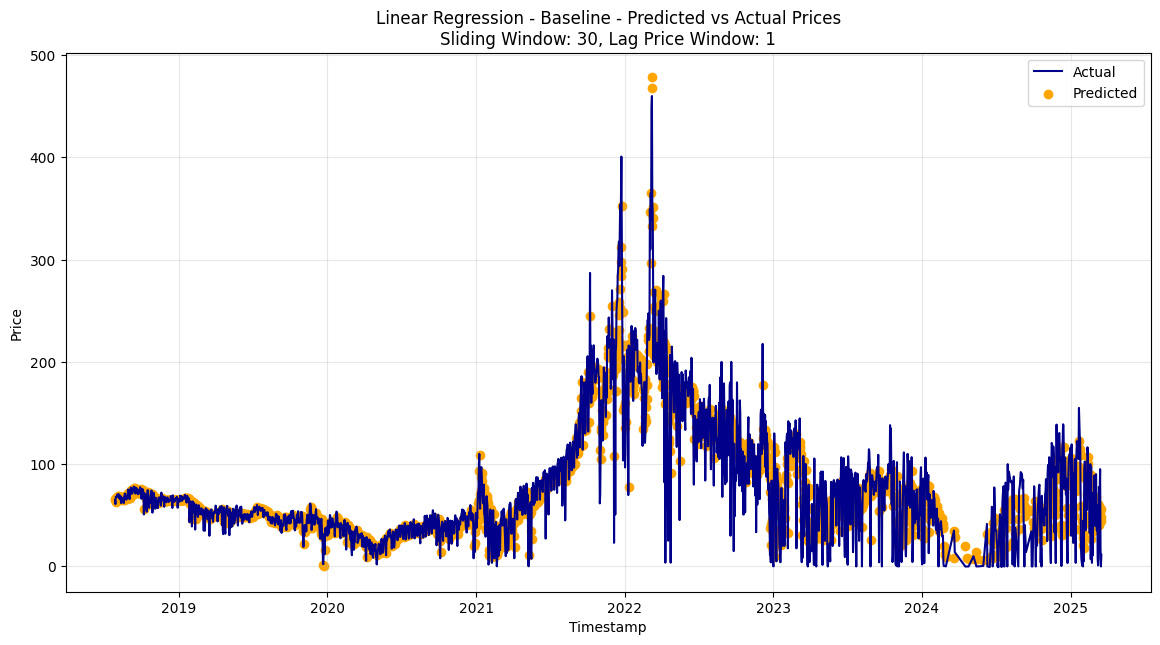

In [15]:
import matplotlib.pyplot as plt
# Plotting the predictions for the best model as scatter plot over the actuals as line plot
plt.figure(figsize=(14, 7))
plt.plot(prediction_df_best_baseline['Timestamp'], prediction_df_best_baseline['Actual'], label='Actual', color='darkblue')
plt.scatter(prediction_df_best_baseline['Timestamp'], prediction_df_best_baseline['Predicted'], label='Predicted', color='orange')
plt.title(f"Linear Regression - Baseline - Predicted vs Actual Prices\nSliding Window: {best_baseline_sliding_window}, Lag Price Window: {best_baseline_lag_price_window}")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regression_baseline_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

Feature engineering version:

In [7]:
# Debug parameter
DEBUG = False

# Define the Sliding Windows for the runs
sliding_windows = [7, 10, 15, 30, 90]  # of days to train on (matrix rows)
lag_price_windows = [1, 2, 4, 6]  # of previous days to use as features (matrix columns)
# lag_price_window must be less than sliding_window
percentiles = [99, 95, 85, 75]

# Initialize comprehensive results list
comprehensive_fe_results = []

for sliding_window in sliding_windows:
    for lag_price_window in lag_price_windows:
        print(f"\nRunning regression training with sliding window: {sliding_window}, price feature window: {lag_price_window}")

        # Run the regression training
        prediction_df = regression_training_fe(df, sliding_window, lag_price_window, DEBUG)
        
        # Calculate overall metrics
        actuals_list = prediction_df['Actual'].values
        predictions_list = prediction_df['Predicted'].values
        timestamps_list = prediction_df['Timestamp'].values

        mse = mean_squared_error(actuals_list, predictions_list)
        mae = mean_absolute_error(actuals_list, predictions_list)
        r2 = r2_score(actuals_list, predictions_list)
        
        # Expectation Shortfall - Calculate metrics for top 5% worst predictions
        # Calculate prediction errors for filtering
        prediction_errors = np.abs(np.array(predictions_list) - np.array(actuals_list))

        # FIXED: Calculate worst 5% error for overall results (same as baseline)
        worst_overall_error_threshold = np.percentile(prediction_errors, 95)  # worst 5% of errors
        worst_overall_indices = prediction_errors >= worst_overall_error_threshold
        avg_worst_error = np.mean(prediction_errors[worst_overall_indices])

        # Add overall results (100% percentile)
        comprehensive_fe_results.append({
            'sliding_window': sliding_window,
            'lag_price_window': lag_price_window,
            'percentile': 100,
            'data_points': len(predictions_list),
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'worst_avg_error': avg_worst_error  # FIXED: Now consistent with baseline
        })

        for p in percentiles:
            # Filter by best predictions (lowest errors)
            best_error_threshold = np.percentile(prediction_errors, p)
            
            # Get indices of best predictions 
            best_indices = prediction_errors <= best_error_threshold

            filtered_actuals = np.array(actuals_list)[best_indices]
            filtered_predictions = np.array(predictions_list)[best_indices]
            filtered_errors = prediction_errors[best_indices]

            if len(filtered_actuals) > 0:
                mse_p = mean_squared_error(filtered_actuals, filtered_predictions)
                mae_p = mean_absolute_error(filtered_actuals, filtered_predictions)
                r2_p = r2_score(filtered_actuals, filtered_predictions)
                
                # FIXED: Calculate worst 5% WITHIN the filtered subset
                worst_5_percent_threshold = np.percentile(filtered_errors, 95)
                worst_5_percent_indices = filtered_errors >= worst_5_percent_threshold
                worst_5_percent_errors = filtered_errors[worst_5_percent_indices]
                avg_worst_5_percent = np.mean(worst_5_percent_errors)

                comprehensive_fe_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': len(filtered_predictions),
                    'mse': mse_p,
                    'mae': mae_p,
                    'r2': r2_p,
                    'worst_avg_error': avg_worst_5_percent  # FIXED: Now consistent
                })
            else:
                # Add entry for no data available
                comprehensive_fe_results.append({
                    'sliding_window': sliding_window,
                    'lag_price_window': lag_price_window,
                    'percentile': p,
                    'data_points': 0,
                    'mse': np.nan,
                    'mae': np.nan,
                    'r2': np.nan,
                    'worst_avg_error': np.nan
                })


Running regression training with sliding window: 7, price feature window: 1
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 2
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 4
Number of models to train: 2252

Running regression training with sliding window: 7, price feature window: 6
Number of models to train: 2252

Running regression training with sliding window: 10, price feature window: 1
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 2
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 4
Number of models to train: 2249

Running regression training with sliding window: 10, price feature window: 6
Number of models to train: 2249

Running regression training with sliding window: 15, price feature window: 1
Number of models to train: 2244

Running regre

In [8]:
# Create comprehensive DataFrame
comprehensive_fe_df = pd.DataFrame(comprehensive_fe_results)

# Save to CSV
comprehensive_fe_df.to_csv('regression_fe_results.csv', index=False)
print(f"\nResults saved to 'regression_fe_results.csv'")


Results saved to 'regression_fe_results.csv'


In [3]:
# retrieve results
comprehensive_fe_df = pd.read_csv('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code/final_metrics/1_regression/regression_fe_results.csv')

# Pareto frontier approach - find models that are best in multiple metrics
def find_pareto_optimal_models(df, percentile=99):
    """Find models that are optimal in at least one metric"""
    subset = df[df['percentile'] == percentile].copy()
    
    # Rank by each metric (lower rank = better)
    subset['mae_rank'] = subset['mae'].rank(ascending=True)
    subset['mse_rank'] = subset['mse'].rank(ascending=True)  # Lower MSE is better
    subset['r2_rank'] = subset['r2'].rank(ascending=False)  # Higher R² is better
    subset['worst_error_rank'] = subset['worst_avg_error'].rank(ascending=True)
    
    # Find average rank across all 4 metrics
    subset['avg_rank'] = (subset['mae_rank'] + subset['mse_rank'] + 
                         subset['r2_rank'] + subset['worst_error_rank']) / 4
    
    return subset.sort_values('avg_rank')

# Get top models by multiple criteria
pareto_fe = find_pareto_optimal_models(comprehensive_fe_df)

print("Top 3 models by multi-criteria ranking (including MSE):")
# Turn mse to rmse for better interpretability
pareto_fe['mse'] = np.sqrt(pareto_fe['mse'])
print(pareto_fe[['sliding_window', 'lag_price_window', 'mae', 'mse', 'r2', 'worst_avg_error', 'avg_rank']].head(3))

Top 3 models by multi-criteria ranking (including MSE):
    sliding_window  lag_price_window        mae        mse        r2  \
16               7                 6  15.062360  24.351090  0.819059   
81              90                 1  22.915602  36.534820  0.616212   
86              90                 2  23.366797  37.301874  0.601812   

    worst_avg_error  avg_rank  
16        75.703571       1.0  
81       113.731289       2.0  
86       116.260707       3.0  


In [16]:
# recalculate the best model predictions
best_fe_sliding_window = int(pareto_fe.head(1)['sliding_window'].values[0])
best_fe_lag_price_window = int(pareto_fe.head(1)['lag_price_window'].values[0])

print(f"Best Feature Engineering Model - Sliding Window: {best_fe_sliding_window}, Lag Price Window: {best_fe_lag_price_window}")

# Run the regression training for the best model
prediction_df_best_fe = regression_training_fe(df, int(best_fe_sliding_window), int(best_fe_lag_price_window), DEBUG=False)

Best Feature Engineering Model - Sliding Window: 7, Lag Price Window: 6
Number of models to train: 2252


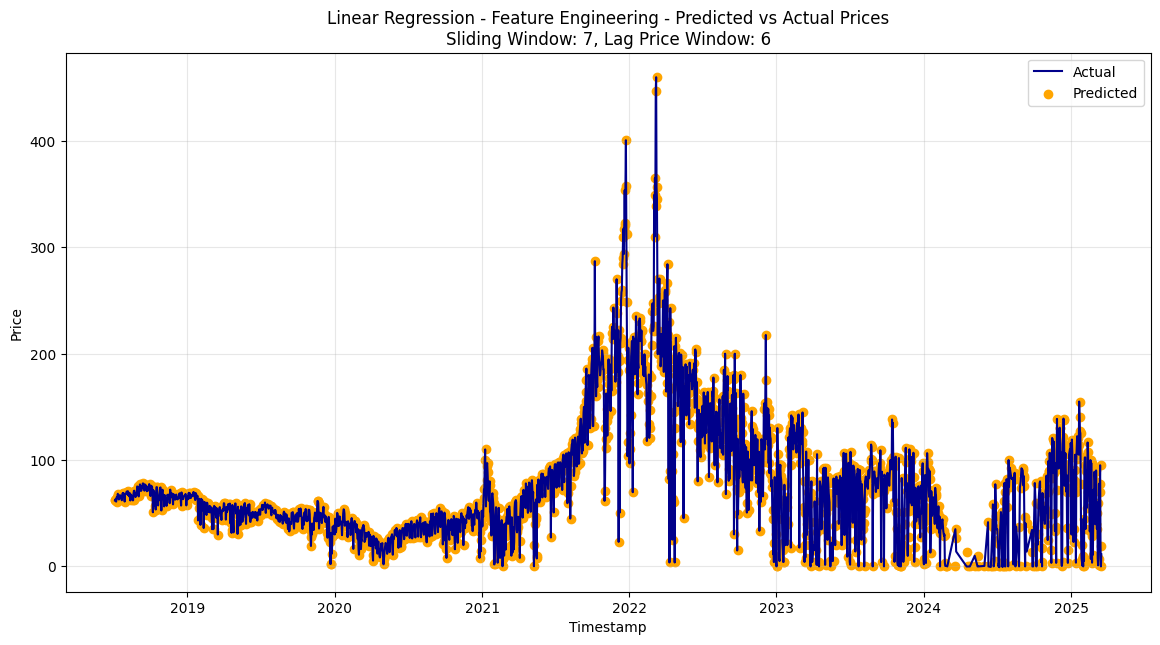

In [17]:
import matplotlib.pyplot as plt
# Plotting the predictions for the best model as scatter plot over the actuals as line plot
plt.figure(figsize=(14, 7))
plt.plot(prediction_df_best_fe['Timestamp'], prediction_df_best_fe['Actual'], label='Actual', color='darkblue')
plt.scatter(prediction_df_best_fe['Timestamp'], prediction_df_best_fe['Predicted'], label='Predicted', color='orange')
plt.title(f"Linear Regression - Feature Engineering - Predicted vs Actual Prices\nSliding Window: {best_fe_sliding_window}, Lag Price Window: {best_fe_lag_price_window}")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regression_fe_best_model.png', dpi=300, bbox_inches='tight')
plt.show()